# Fetal Health Classification 
### Author: Diane Tunnicliffe

## Overview
"Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more."



## Business Problem

Preventative care. Pitch to doctors. To decrease the risk of preventable fetal and maternal mortality, I will be answering the question of how to predict fetal health outcomes based on CTG data. This information can be used by medical professionals, specifically in the field of obstetrics, to minimize the occurrence of fetal mortality. While this is arguably more of a health problem than a business problem, medical practices can benefit greatly from these findings by ensuring the best possible patient health. 

### Hypotheses  

Null hypothesis (H0): There is no relationship between automated CTG data and fetal health outcome.  
Alternative hypothesis (Ha): There is a relationship between automated CTG data and fetal health outcome. 

I will be using a significance level (alpha) of 0.05 to make my determination, and will make my final recommendations accordingly.

## Data Understanding
"Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more."  

The dataset used for this project can be found at https://www.kaggle.com/andrewmvd/fetal-health-classification. It contains 2,126 rows of 22 features extracted from Cardiotocogram (CTG) exams, which were then classified by three expert obstetritians into 3 classes:
* Normal
* Suspect 
* Pathological  


Citation: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318. The original study can be found at https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9. 



In [79]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [80]:
# reading the csv file
df = pd.read_csv('data/fetal_health.csv')
# previewing the DataFrame
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,2.000
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,1.000
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,1.000
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,1.000
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,1.000


In [81]:
# getting info for DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
baseline value                                            2126 non-null float64
accelerations                                             2126 non-null float64
fetal_movement                                            2126 non-null float64
uterine_contractions                                      2126 non-null float64
light_decelerations                                       2126 non-null float64
severe_decelerations                                      2126 non-null float64
prolongued_decelerations                                  2126 non-null float64
abnormal_short_term_variability                           2126 non-null float64
mean_value_of_short_term_variability                      2126 non-null float64
percentage_of_time_with_abnormal_long_term_variability    2126 non-null float64
mean_value_of_long_term_variability                       2126 non-null float64
histogram_wid

In [82]:
df.shape

(2126, 22)

In [83]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,...,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000
mean,133.304,0.003,0.009,0.004,0.002,0.000,0.000,46.990,1.333,9.847,...,93.579,164.025,4.068,0.324,137.452,134.611,138.090,18.808,0.320,1.304
std,9.841,0.004,0.047,0.003,0.003,0.000,0.001,17.193,0.883,18.397,...,29.560,17.944,2.949,0.706,16.381,15.594,14.467,28.978,0.611,0.614
min,106.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,0.200,0.000,...,50.000,122.000,0.000,0.000,60.000,73.000,77.000,0.000,-1.000,1.000
25%,126.000,0.000,0.000,0.002,0.000,0.000,0.000,32.000,0.700,0.000,...,67.000,152.000,2.000,0.000,129.000,125.000,129.000,2.000,0.000,1.000
50%,133.000,0.002,0.000,0.004,0.000,0.000,0.000,49.000,1.200,0.000,...,93.000,162.000,3.000,0.000,139.000,136.000,139.000,7.000,0.000,1.000
75%,140.000,0.006,0.003,0.007,0.003,0.000,0.000,61.000,1.700,11.000,...,120.000,174.000,6.000,0.000,148.000,145.000,148.000,24.000,1.000,1.000
max,160.000,0.019,0.481,0.015,0.015,0.001,0.005,87.000,7.000,91.000,...,159.000,238.000,18.000,10.000,187.000,182.000,186.000,269.000,1.000,3.000


In [84]:
# renaming baseline value column to make it easier to work with
df = df.rename(columns = {'baseline value':'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations'})
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

The columns are described from the data source as follows: 

* baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)  
* accelerations - Number of accelerations per second  
* fetal_movement - Number of fetal movements per second  
* uterine_contractions - Number of uterine contractions per second  
* light_decelerations - Number of light decelerations per second  
* severe_decelerations - Number of severe decelerations per second  
* prolongued_decelerations - Number of prolonged decelerations per second  * abnormal_short_term_variability - Percentage of time with abnormal short-term variability  
* mean_value_of_short_term_variability - Mean value of short-term variability  
* percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability  
* mean_value_of_long_term_variability - Mean value of long-term variability 
* histogram_width - Width of FHR histogram (generated from exam)  
* histogram_min - Minimum of FHR histogram (generated from exam)  
* histogram_max - Maximum of FHR histogram (generated from exam)  
* histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)  
* histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)  
* histogram_mode - Mode of FHR histogram (generated from exam)  
* histogram_mean - Mean of FHR histogram (generated from exam)  
* histogram_median - Median of FHR histogram (generated from exam)  
* histogram_variance - Variance of FHR histogram (generated from exam)  
* histogram_tendency - Tendency of FHR histogram (generated from exam)  
* fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological           

In [85]:
# getting value counts for fetal accelerations column
df.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

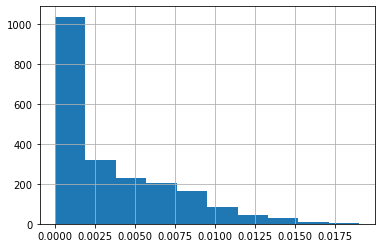

In [86]:
# plotting acceleration frequencies
df.accelerations.hist();

The majority of observed fetal heart rate accelerations were 0.00. 

In [87]:
# getting value counts for fetal movement column
df.fetal_movement.value_counts()

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.340       1
0.383       1
0.092       1
0.032       1
0.306       1
Name: fetal_movement, Length: 102, dtype: int64

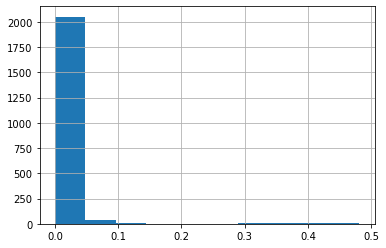

In [88]:
# plotting fetal movement frequencies
df.fetal_movement.hist();

The fetal movement value with the highest frequency is once again 0.00.

In [89]:
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

There were only 7 observed severe decelerations in the dataset.

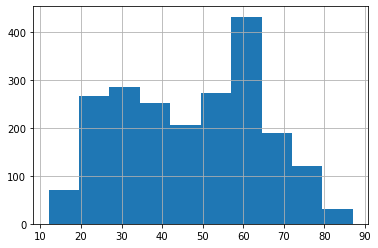

In [90]:
df.abnormal_short_term_variability.hist();

This column is a measure of the percentage of time with abnormal short-term variability. According to the American Academy of Family Physicians (AAFP.org), short-term variability of the fetal heart rate is defined as "the oscillation of the FHR around the baseline in amplitude of 5 to 10 bpm." In other words, it is normal and expected to have some variability of the fetal heart rate around the baseline. However, this column is a measure of the percentage of time that an abnormal variability was observed. Considering that most of the fetal health outcomes were normal, I found it surprising that there were quite a few records with high abnormal percentages of short-term variability.

In [91]:
df.histogram_width.describe()

count   2126.000
mean      70.446
std       38.956
min        3.000
25%       37.000
50%       67.500
75%      100.000
max      180.000
Name: histogram_width, dtype: float64

In [92]:
df.histogram_min.describe()

count   2126.000
mean      93.579
std       29.560
min       50.000
25%       67.000
50%       93.000
75%      120.000
max      159.000
Name: histogram_min, dtype: float64

In [93]:
df.histogram_max.describe()

count   2126.000
mean     164.025
std       17.944
min      122.000
25%      152.000
50%      162.000
75%      174.000
max      238.000
Name: histogram_max, dtype: float64

In [94]:
df.corr()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline_value,1.000,-0.081,-0.033,-0.146,-0.159,-0.054,-0.105,0.306,-0.280,0.286,...,0.362,0.275,-0.114,-0.005,0.709,0.723,0.789,-0.134,0.294,0.148
accelerations,-0.081,1.000,0.048,0.090,-0.109,-0.043,-0.128,-0.280,0.207,-0.374,...,-0.154,0.394,0.190,-0.006,0.244,0.270,0.273,0.126,0.028,-0.364
fetal_movement,-0.033,0.048,1.000,-0.069,0.049,-0.011,0.266,-0.104,0.121,-0.074,...,-0.154,0.100,0.165,-0.018,-0.061,-0.090,-0.072,0.179,-0.002,0.088
uterine_contractions,-0.146,0.090,-0.069,1.000,0.285,0.007,0.077,-0.233,0.290,-0.307,...,-0.113,0.123,0.083,0.058,-0.105,-0.188,-0.140,0.239,-0.072,-0.205
light_decelerations,-0.159,-0.109,0.049,0.285,1.000,0.108,0.226,-0.119,0.562,-0.271,...,-0.554,0.218,0.398,0.235,-0.347,-0.527,-0.389,0.564,0.000,0.059
severe_decelerations,-0.054,-0.043,-0.011,0.007,0.108,1.000,0.012,0.034,0.034,-0.031,...,-0.072,-0.021,0.007,0.043,-0.215,-0.159,-0.160,0.136,-0.070,0.132
prolonged_decelerations,-0.105,-0.128,0.266,0.077,0.226,0.012,1.000,0.046,0.267,-0.137,...,-0.277,0.120,0.223,0.056,-0.436,-0.489,-0.445,0.503,-0.215,0.485
abnormal_short_term_variability,0.306,-0.280,-0.104,-0.233,-0.119,0.034,0.046,1.000,-0.431,0.459,...,0.275,-0.112,-0.168,-0.149,0.058,0.075,0.120,-0.146,-0.006,0.471
mean_value_of_short_term_variability,-0.280,0.207,0.121,0.290,0.562,0.034,0.267,-0.431,1.000,-0.470,...,-0.623,0.409,0.501,0.266,-0.308,-0.445,-0.336,0.556,-0.066,-0.103
percentage_of_time_with_abnormal_long_term_variability,0.286,-0.374,-0.074,-0.307,-0.271,-0.031,-0.137,0.459,-0.470,1.000,...,0.423,-0.283,-0.279,-0.122,0.165,0.222,0.186,-0.282,0.042,0.426


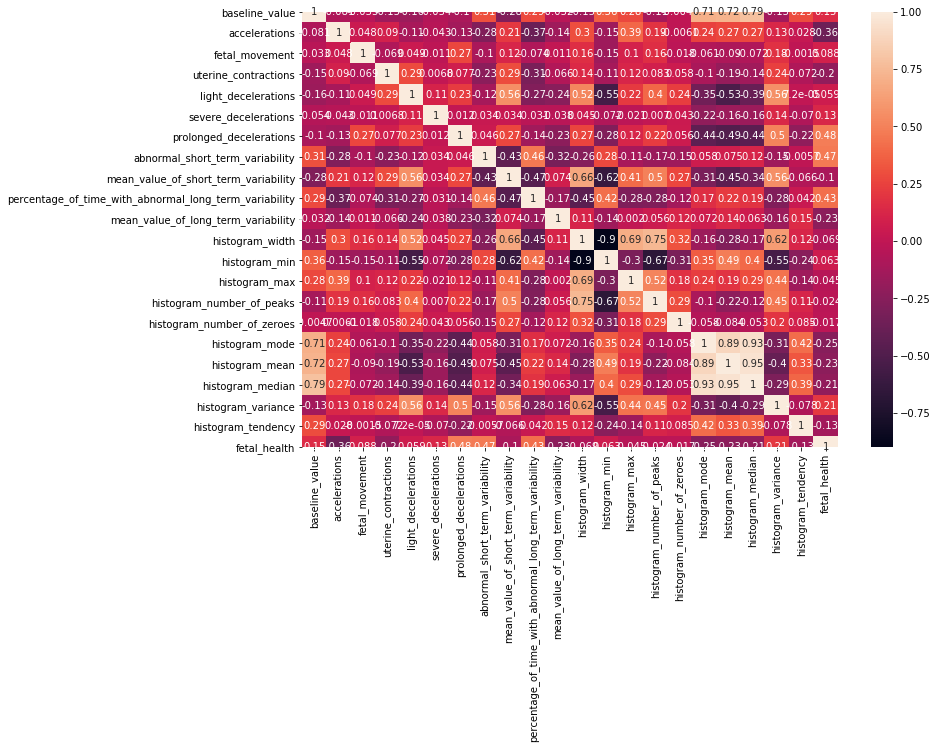

In [95]:
# generate heatmap to display correlations in data
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True);

The feature showing the strongest correlation with fetal health is prolonged decelerations, with a correlation of 0.485. There are moderate correlations also observed between fetal health and abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability. 

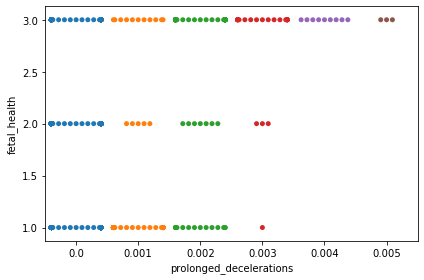

In [96]:
# examining the relationship between prolonged decelerations and fetal health
sns.swarmplot('prolonged_decelerations','fetal_health', data=df)
plt.tight_layout();

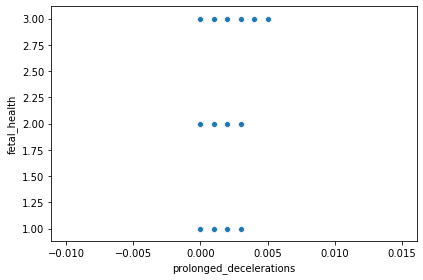

In [97]:
sns.scatterplot('prolonged_decelerations','fetal_health', data=df)
plt.tight_layout();

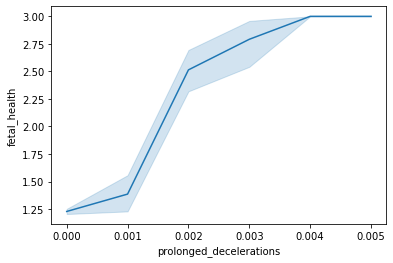

In [98]:
sns.lineplot('prolonged_decelerations','fetal_health', data=df);

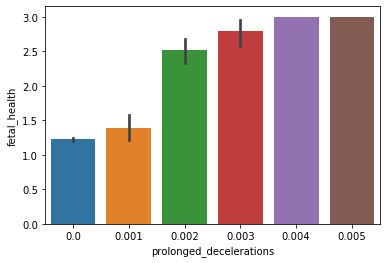

In [99]:
sns.barplot('prolonged_decelerations','fetal_health', data=df);

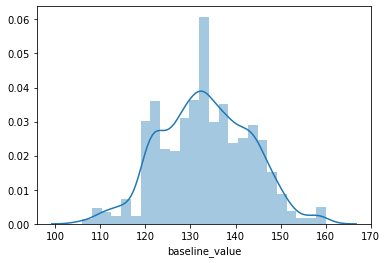

In [100]:
sns.distplot(df['baseline_value']);

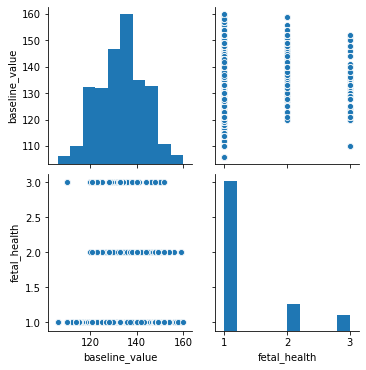

In [101]:
sns.pairplot(df[['baseline_value', 'fetal_health']]);

## Data Preparation

In [102]:
# checking for null values
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

This dataset had no null values to be dealt with.

In [103]:
# checking value counts for target variable
df.fetal_health.value_counts()

1.000    1655
2.000     295
3.000     176
Name: fetal_health, dtype: int64

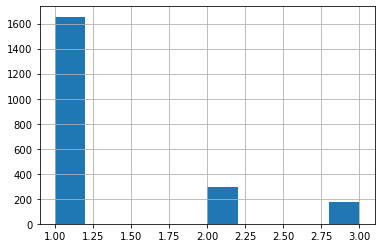

In [104]:
# plotting target variable frequencies
df.fetal_health.hist();

### Feature Engineering
The target class, fetal health, is very unbalanced. The majority of the fetal health outcomes observed in this dataset are 1.00, which is the designation for Normal fetal health. The class with the second-highest frequency is the 2.00 or Suspect fetal health class. The class with the lowest frequency in this dataset is 3.00 or Pathological fetal health.  
To make the data slightly easier to work with and understand, I combined the 2.00 and 3.00 classes of Suspect and Pathological fetal health into a category called At Risk. I designated all the values of 1.00 as Normal. For models that cannot work with categorical outcomes, I one-hot encoded these values as separate columns as well.

In [105]:
# engineering new categorical target column for Normal and At Risk fetal health
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

In [106]:
df.head()b

SyntaxError: invalid syntax (<ipython-input-106-41156c3cac03>, line 1)

In [ ]:
df.fh_outcome.hist();

This is still very unbalanced, but is somewhat more straightforward.

## Modeling

Confusion matrix, ROC curve -- here or in next section?

#### AutoML with TPOT
"TPOT is a Python tool which "automatically creates and optimizes machine learning pipelines using genetic programming." TPOT works in tandem with Scikit-learn, describing itself as a Scikit-learn wrapper. TPOT is open source, written in Python, and aimed at simplifying a machine learning process by way of an AutoML approach based on genetic programming. The end result is automated hyperparameter selection, modeling with a variety of algorithms, and exploration of numerous feature representations, all leading to iterative model building and model evaluation."

## Evaluation

The positive class for fetal health is 'At Risk' and the negative class is 'Normal'. The objective is to minimize false negatives and err on the side of caution. Better safe than sorry! Being overly cautious is the ethical course of action when dealing with maternal-fetal health. Misclassifying a member of the 'Normal' class as 'At Risk' is a minor inconvenience (and likely a scare for the mother), but misclassifying a member of the 'At Risk' class as 'Normal' has far more serious consequences. I want to make sure that we catch every single baby that is in distress so that decisions can be made accordingly. Therefore, I will be prioritizing Recall/Sensitivity as the metric to evaluate the models. This will ensure that we capture all instances of the positive class, which makes this the most important metric for the problem at hand. By doing this, I will avoid false negatives or Type II errors.

## Results

## Recommendations

## Conclusion